# Cleaning and Preprocessing Data for Machine Learning

In [314]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import date, datetime
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle

Kaggle TMDB Competition Test Data 

In [315]:
# Read the csv files into a pandas DataFrame
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#test.head(2)
#train.head(2)

## Assign weights to Cast by actor on # "appearances"

In [316]:
# Import Cast Table with Counts of Appearances
file = "Cast_Data.csv"
castData = pd.read_csv(file)
castData.rename(columns = {"# times in DS":"numtimesDS"}, inplace = True)
castData.sort_values(by='numtimesDS', ascending=False, inplace = True)
# calculation to create the actor wt
castData['actorWt'] = castData['numtimesDS']/castData['numtimesDS'].max().astype(np.float64)
castData.head(100)

,Actor_ID,Actor_Name,numtimesDS,actorWt
38689,2,Mark Hamill,34,1.000000
37847,2231,Samuel L. Jackson,30,0.882353
38554,380,Robert De Niro,30,0.882353
38691,0,name,29,0.852941
38625,192,Morgan Freeman,27,0.794118
38660,62,Bruce Willis,25,0.735294
37249,3896,Liam Neeson,25,0.735294
33565,18999,J.K. Simmons,25,0.735294
37203,4038,Susan Sarandon,25,0.735294
38200,1241,John Turturro,24,0.705882


## Assign weights to Production Company by # "appearances"

In [317]:
# Import Cast Table with Counts of Appearances
file = "ProdCo_Data.csv"
prodcoData = pd.read_csv(file)
prodcoData.rename(columns = {"Prod_Co":"numtimesDS"}, inplace = True)
prodcoData.sort_values(by='numtimesDS', ascending=False, inplace = True)

prodcoData['prodcoWt'] = prodcoData['numtimesDS']/prodcoData['numtimesDS'].max().astype(np.float64)
prodcoData.head()

,Prod_Co_keyID,numtimesDS,keyID,prodcoWt
0,Warner Bros.,132,6194,1.000000
1,Metro-Goldwyn-Mayer (MGM),44,8411,0.333333
2,Relativity Media,42,7295,0.318182
3,Canal+,41,5358,0.310606
4,Touchstone Pictures,35,9195,0.265152


## Assign weights to Production Company by # "appearances"

In [318]:
# Import Cast Table with Counts of Appearances
file = "Keyword_Data.csv"
keywordData = pd.read_csv(file)
keywordData.rename(columns = {"# of Uses in DS":"numtimesDS"}, inplace = True)
keywordData.sort_values(by='numtimesDS', ascending=False, inplace = True)

keywordData['keywordWt'] = keywordData['numtimesDS']/keywordData['numtimesDS'].max().astype(np.float64)
keywordData.head(100)

,Keyword ID,Keyword,numtimesDS,keywordWt
0,187056,woman director,174,1.000000
1,10183,independent film,155,0.890805
2,179431,duringcreditsstinger,134,0.770115
3,9826,murder,123,0.706897
4,818,based on novel,111,0.637931
5,14819,violence,87,0.500000
6,6075,sport,82,0.471264
7,5565,biography,77,0.442529
8,179430,aftercreditsstinger,75,0.431034
10,9748,revenge,73,0.419540


In [319]:
# now, pull out the cast column for testing
#new_cast_train = pd.DataFrame(train['cast'])
#new_cast_test = pd.DataFrame(test['cast'])
#new_cast_train.head()

In [320]:
#https://www.kaggle.com/rajuspartan/exploratory-data-analysis-with-reusable-functions
#Flatening JSON columns
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d
train["castList"] = train.cast.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test["castList"] = test.cast.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

train["keywordList"] = train.Keywords.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test["keywordList"] = test.Keywords.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

train["prodcoList"] = train.production_companies.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
test["prodcoList"] = test.production_companies.map(lambda x: sorted([d['id'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

In [321]:
train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,status,tagline,title,Keywords,cast,crew,revenue,castList,keywordList,prodcoList
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"2224,3036,36801,52997,54729,54812,59256,64342,...","4379,9663,11830,179431","4,60,8411"


In [322]:
test.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,Keywords,cast,crew,castList,keywordList,prodcoList
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...","73044,82140,108721,110045,111767,111768,111779","11451,11551",


# Cast, Keyword, Production Company Grading

In [323]:
#Convert string to list, separate on commas
train['castList'] = train['castList'].apply(lambda x: x[1:-1].split(','))
test['castList'] = test['castList'].apply(lambda x: x[1:-1].split(','))

train['keywordList'] = train['keywordList'].apply(lambda x: x[1:-1].split(','))
test['keywordList'] = test['keywordList'].apply(lambda x: x[1:-1].split(','))

train['prodcoList'] = train['prodcoList'].apply(lambda x: x[1:-1].split(','))
test['prodcoList'] = test['prodcoList'].apply(lambda x: x[1:-1].split(','))

In [324]:
#create sum of weights column
def weight(data):
    wt = 0
    for row in data:
        for x in row:
            wt = wt + int(x)
            
    return wt

train['castWt'] = train['castList'].apply(weight)
test['castWt'] = test['castList'].apply(weight)

train['keywordWt'] = train['keywordList'].apply(weight)
test['keywordWt'] = test['keywordList'].apply(weight)  

train['prodcoWt'] = train['prodcoList'].apply(weight)
test['prodcoWt'] = test['prodcoList'].apply(weight)  

In [325]:
train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Keywords,cast,crew,revenue,castList,keywordList,prodcoList,castWt,keywordWt,prodcoWt
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[224, 3036, 36801, 52997, 54729, 54812, 59256,...","[379, 9663, 11830, 17943]","[, 60, 841]",597,80,19


In [326]:
test.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,title,Keywords,cast,crew,castList,keywordList,prodcoList,castWt,keywordWt,prodcoWt
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...","[3044, 82140, 108721, 110045, 111767, 111768, ...","[1451, 1155]",[],120,23,0


# Create count features

In [327]:

#https://www.kaggle.com/jiegeng94/machine-learning-beginner-tutorial
def proc_json_len(string):
    try:
        data = eval(string)
        return len(data)
    except:
        return 0

train['count_genre'] = train.genres.apply(proc_json_len)
train['count_country'] = train.production_countries.apply(proc_json_len)
train['count_company'] = train.production_companies.apply(proc_json_len)
train['count_splang'] = train.spoken_languages.apply(proc_json_len)
train['count_cast'] = train.cast.apply(proc_json_len)
train['count_crew'] = train.crew.apply(proc_json_len)
train['count_staff'] = train.count_cast + train.count_crew
train['count_keyword'] = train.Keywords.apply(proc_json_len)
    
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,keywordWt,prodcoWt,count_genre,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,80,19,1,1,3,1,24,72,96,4
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,53,0,4,1,1,1,20,9,29,4
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,234,38,1,1,3,1,51,64,115,12
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,115,0,2,1,0,2,7,3,10,7
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,2,1,0,1,4,2,6,0


In [328]:
test['count_genre'] = test.genres.apply(proc_json_len)
test['count_country'] = test.production_countries.apply(proc_json_len)
test['count_company'] = test.production_companies.apply(proc_json_len)
test['count_splang'] = test.spoken_languages.apply(proc_json_len)
test['count_cast'] = test.cast.apply(proc_json_len)
test['count_crew'] = test.crew.apply(proc_json_len)
test['count_staff'] = test.count_cast + test.count_crew
test['count_keyword'] = test.Keywords.apply(proc_json_len)
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,keywordWt,prodcoWt,count_genre,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,23,0,4,2,0,2,7,2,9,2
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,161,5,2,1,1,1,10,8,18,8
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,68,44,2,1,3,1,9,10,19,4
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,263,38,3,2,3,3,23,69,92,15
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,56,0,2,1,0,1,4,14,18,4


In [329]:
#Collection or not?
train['belongs_to_collection'] = train['belongs_to_collection'].notna()
test['belongs_to_collection'] = test['belongs_to_collection'].notna()

#Create a Year Column
train['date'] = pd.to_datetime(train['release_date'])
train['year'] = train['date'].dt.year

test['date'] = pd.to_datetime(test['release_date'])
test['year'] = test['date'].dt.year

#Create a Month Column
train['month'] = train['date'].dt.month
test['month'] = test['date'].dt.month

test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,date,year,month
0,3001,True,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,2,0,2,7,2,9,2,2007-07-14,2007.0,7.0
1,3002,False,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,1,1,1,10,8,18,8,2058-05-19,2058.0,5.0


In [330]:
##GENRES

In [331]:
new_genres_train = pd.DataFrame(train['genres'])
new_genres_test = pd.DataFrame(test['genres'])
new_genres_test.head()

,genres
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '..."
1,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na..."
2,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
3,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n..."
4,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na..."


In [332]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d
#https://www.kaggle.com/rajuspartan/exploratory-data-analysis-with-reusable-functions
#Flatening JSON columns
new_genres_train.genres = new_genres_train.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
new_genres_test.genres = new_genres_test.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

In [333]:
new_genres_test.head()

,genres
0,"Adventure,Animation,Family,Fantasy"
1,"Horror,Science Fiction"
2,"Comedy,Romance"
3,"Drama,Mystery,War"
4,"Documentary,History"


In [334]:
#Used this approach from Stack Overflow
#https://stackoverflow.com/questions/50394099/separate-columns-based-on-genre
#featurize the genre column
new_genres_train = new_genres_train['genres'].str.get_dummies(',')
new_genres_test = new_genres_test['genres'].str.get_dummies(',')
print(new_genres_test)

      Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0          0          1          1       0      0            0      0       1   
1          0          0          0       0      0            0      0       0   
2          0          0          0       1      0            0      0       0   
3          0          0          0       0      0            0      1       0   
4          0          0          0       0      0            1      0       0   
5          0          0          0       1      0            0      1       0   
6          0          0          0       1      0            0      1       0   
7          0          0          1       0      0            0      0       1   
8          0          0          0       0      0            0      1       0   
9          0          0          1       1      0            0      0       1   
10         0          0          0       1      0            0      0       0   
11         0          0     

In [335]:
#add genres back to data (join)
train = pd.concat([train, new_genres_train], axis = 1, sort = False)
test = pd.concat([test, new_genres_test], axis = 1, sort = False)

test.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,3001,True,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,0,0,0,0,0,0,0,0,0,0
1,3002,False,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,0,0,1,0,0,0,1,0,0,0
2,3003,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,0,0,0,0,0,1,0,0,0,0
3,3004,False,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,0,0,0,0,1,0,0,0,1,0
4,3005,False,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,0,1,0,0,0,0,0,0,0,0


In [336]:
test.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'castList',
       'keywordList', 'prodcoList', 'castWt', 'keywordWt', 'prodcoWt',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_staff', 'count_keyword', 'date',
       'year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [337]:
#Select subset of columns
train = train[['id','belongs_to_collection','budget', 'original_language', 'popularity', 'status','year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_staff', 'count_keyword', "castWt",'prodcoWt','keywordWt', "revenue"]]
test = test[['id','belongs_to_collection','budget', 'original_language', 'popularity', 'status','year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'Thriller', 'War', 'Western', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_staff', 'count_keyword', "castWt",'prodcoWt','keywordWt']]

test.head()

,id,belongs_to_collection,budget,original_language,popularity,status,year,month,Action,Adventure,...,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt
0,3001,True,0,ja,3.851534,Released,2007.0,7.0,0,1,...,2,0,2,7,2,9,2,120,0,23
1,3002,False,88000,en,3.559789,Released,2058.0,5.0,0,0,...,1,1,1,10,8,18,8,185,5,161
2,3003,False,0,en,8.085194,Released,1997.0,5.0,0,0,...,1,3,1,9,10,19,4,128,44,68
3,3004,False,6800000,fr,8.596012,Released,2010.0,9.0,0,0,...,2,3,3,23,69,92,15,611,38,263
4,3005,False,2000000,en,3.217680,Released,2005.0,2.0,0,0,...,1,0,1,4,14,18,4,84,0,56


In [338]:
train.head()

,id,belongs_to_collection,budget,original_language,popularity,status,year,month,Action,Adventure,...,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt,revenue
0,1,True,14000000,en,6.575393,Released,2015,2,0,0,...,3,1,24,72,96,4,597,19,80,12314651
1,2,True,40000000,en,8.248895,Released,2004,8,0,0,...,1,1,20,9,29,4,385,0,53,95149435
2,3,False,3300000,en,64.299990,Released,2014,10,0,0,...,3,1,51,64,115,12,1270,38,234,13092000
3,4,False,1200000,hi,3.174936,Released,2012,3,0,0,...,0,2,7,3,10,7,151,0,115,16000000
4,5,False,0,ko,1.148070,Released,2009,2,1,0,...,0,1,4,2,6,0,80,0,0,3923970


In [339]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'original_language',
       'popularity', 'status', 'year', 'month', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_staff', 'count_keyword', 'castWt',
       'prodcoWt', 'keywordWt', 'revenue'],
      dtype='object')

In [340]:
test.columns

Index(['id', 'belongs_to_collection', 'budget', 'original_language',
       'popularity', 'status', 'year', 'month', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_staff', 'count_keyword', 'castWt',
       'prodcoWt', 'keywordWt'],
      dtype='object')

Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers. We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing libarary for all of these standard preprocessing techniques. Pandas also provides a `get_dummies` method that is useful to generate binary encoded data from a Data Frame. 

## Dummy Encoding (Binary Encoded Data)

Dummy Encoding transforms each categorical feature into new columns with a 1 (True) or 0 (False) encoding to represent if that categorical label was present or not in the original row. 

Pandas provides a shortcut to create Binary Encoded data.

In [341]:
data = train.copy()
data2 = test.copy()

In [342]:
data_binary_encoded = pd.get_dummies(data, columns=["belongs_to_collection", "status"])
data2_binary_encoded = pd.get_dummies(data2, columns=["belongs_to_collection", "status"])

data2_binary_encoded.head()

,id,budget,original_language,popularity,year,month,Action,Adventure,Animation,Comedy,...,count_staff,count_keyword,castWt,prodcoWt,keywordWt,belongs_to_collection_False,belongs_to_collection_True,status_Post Production,status_Released,status_Rumored
0,3001,0,ja,3.851534,2007.0,7.0,0,1,1,0,...,9,2,120,0,23,0,1,0,1,0
1,3002,88000,en,3.559789,2058.0,5.0,0,0,0,0,...,18,8,185,5,161,1,0,0,1,0
2,3003,0,en,8.085194,1997.0,5.0,0,0,0,1,...,19,4,128,44,68,1,0,0,1,0
3,3004,6800000,fr,8.596012,2010.0,9.0,0,0,0,0,...,92,15,611,38,263,1,0,0,1,0
4,3005,2000000,en,3.217680,2005.0,2.0,0,0,0,0,...,18,4,84,0,56,1,0,0,1,0


In [343]:
#Select subset of columns
train = data_binary_encoded[['id','belongs_to_collection_True', 'budget', 'original_language', 'popularity', 'status_Released', 'year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_staff', 'count_keyword', "castWt",'prodcoWt','keywordWt', 'revenue']]
train.head()

,id,belongs_to_collection_True,budget,original_language,popularity,status_Released,year,month,Action,Adventure,...,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt,revenue
0,1,1,14000000,en,6.575393,1,2015,2,0,0,...,3,1,24,72,96,4,597,19,80,12314651
1,2,1,40000000,en,8.248895,1,2004,8,0,0,...,1,1,20,9,29,4,385,0,53,95149435
2,3,0,3300000,en,64.299990,1,2014,10,0,0,...,3,1,51,64,115,12,1270,38,234,13092000
3,4,0,1200000,hi,3.174936,1,2012,3,0,0,...,0,2,7,3,10,7,151,0,115,16000000
4,5,0,0,ko,1.148070,1,2009,2,1,0,...,0,1,4,2,6,0,80,0,0,3923970


In [344]:
test = data2_binary_encoded[['id','belongs_to_collection_True', 'budget', 'original_language', 'popularity', 'status_Released', 'year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction','Thriller', 'War', 'Western', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_staff', 'count_keyword', "castWt", 'prodcoWt','keywordWt']]
test.head()

,id,belongs_to_collection_True,budget,original_language,popularity,status_Released,year,month,Action,Adventure,...,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt
0,3001,1,0,ja,3.851534,1,2007.0,7.0,0,1,...,2,0,2,7,2,9,2,120,0,23
1,3002,0,88000,en,3.559789,1,2058.0,5.0,0,0,...,1,1,1,10,8,18,8,185,5,161
2,3003,0,0,en,8.085194,1,1997.0,5.0,0,0,...,1,3,1,9,10,19,4,128,44,68
3,3004,0,6800000,fr,8.596012,1,2010.0,9.0,0,0,...,2,3,3,23,69,92,15,611,38,263
4,3005,0,2000000,en,3.217680,1,2005.0,2.0,0,0,...,1,0,1,4,14,18,4,84,0,56


## Factorize to map each categorical item in a column to a value

In [345]:
train['language_enc'] = pd.factorize(train['original_language'])[0]
train.head()

,id,belongs_to_collection_True,budget,original_language,popularity,status_Released,year,month,Action,Adventure,...,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt,revenue,language_enc
0,1,1,14000000,en,6.575393,1,2015,2,0,0,...,1,24,72,96,4,597,19,80,12314651,0
1,2,1,40000000,en,8.248895,1,2004,8,0,0,...,1,20,9,29,4,385,0,53,95149435,0
2,3,0,3300000,en,64.299990,1,2014,10,0,0,...,1,51,64,115,12,1270,38,234,13092000,0
3,4,0,1200000,hi,3.174936,1,2012,3,0,0,...,2,7,3,10,7,151,0,115,16000000,1
4,5,0,0,ko,1.148070,1,2009,2,1,0,...,1,4,2,6,0,80,0,0,3923970,2


In [346]:
test['language_enc'] = pd.factorize(test['original_language'])[0]
test.head()

,id,belongs_to_collection_True,budget,original_language,popularity,status_Released,year,month,Action,Adventure,...,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt,language_enc
0,3001,1,0,ja,3.851534,1,2007.0,7.0,0,1,...,0,2,7,2,9,2,120,0,23,0
1,3002,0,88000,en,3.559789,1,2058.0,5.0,0,0,...,1,1,10,8,18,8,185,5,161,1
2,3003,0,0,en,8.085194,1,1997.0,5.0,0,0,...,3,1,9,10,19,4,128,44,68,1
3,3004,0,6800000,fr,8.596012,1,2010.0,9.0,0,0,...,3,3,23,69,92,15,611,38,263,2
4,3005,0,2000000,en,3.217680,1,2005.0,2.0,0,0,...,0,1,4,14,18,4,84,0,56,1


In [347]:
#This is just a list of all of the languages listed
catenc = pd.factorize(train['original_language'])
catenc


(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Index(['en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta', 'cn',
        'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da', 'fi', 'el',
        'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu', 'ml', 'bn', 'id'],
       dtype='object'))


# FINAL CLEANUP FOR NaN

In [304]:
#Select subset of columns
train = train[['id','belongs_to_collection_True', 'budget', 'language_enc', 'popularity', 'status_Released','year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_staff', 'count_keyword', "castWt",'prodcoWt','keywordWt',"revenue"]]
train.head()

,id,belongs_to_collection_True,budget,language_enc,popularity,status_Released,year,month,Action,Adventure,...,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt,revenue
0,1,1,14000000,0,6.575393,1,2015,2,0,0,...,3,1,24,72,96,4,597,19,80,12314651
1,2,1,40000000,0,8.248895,1,2004,8,0,0,...,1,1,20,9,29,4,385,0,53,95149435
2,3,0,3300000,0,64.299990,1,2014,10,0,0,...,3,1,51,64,115,12,1270,38,234,13092000
3,4,0,1200000,1,3.174936,1,2012,3,0,0,...,0,2,7,3,10,7,151,0,115,16000000
4,5,0,0,2,1.148070,1,2009,2,1,0,...,0,1,4,2,6,0,80,0,0,3923970


In [305]:
#testID = test[['id']]
test = test[['id','belongs_to_collection_True', 'budget', 'language_enc', 'popularity', 'status_Released','year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'Thriller', 'War', 'Western', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_staff', 'count_keyword', "castWt",'prodcoWt','keywordWt']]
test.head()

,id,belongs_to_collection_True,budget,language_enc,popularity,status_Released,year,month,Action,Adventure,...,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt
0,3001,1,0,0,3.851534,1,2007.0,7.0,0,1,...,2,0,2,7,2,9,2,120,0,23
1,3002,0,88000,1,3.559789,1,2058.0,5.0,0,0,...,1,1,1,10,8,18,8,185,5,161
2,3003,0,0,1,8.085194,1,1997.0,5.0,0,0,...,1,3,1,9,10,19,4,128,44,68
3,3004,0,6800000,2,8.596012,1,2010.0,9.0,0,0,...,2,3,3,23,69,92,15,611,38,263
4,3005,0,2000000,1,3.217680,1,2005.0,2.0,0,0,...,1,0,1,4,14,18,4,84,0,56


In [306]:
df1_NaN = test[test.isnull().any(axis=1)]
print(df1_NaN)

       id  belongs_to_collection_True  budget  language_enc  popularity  \
828  3829                           0       0             1    0.009057   

     status_Released  year  month  Action  Adventure    ...      \
828                0   NaN    NaN       0          0    ...       

     count_country  count_company  count_splang  count_cast  count_crew  \
828              0              0             0           0           0   

     count_staff  count_keyword  castWt  prodcoWt  keywordWt  
828            0              0       0         0          0  

[1 rows x 38 columns]


In [307]:
test.fillna(0,inplace = True)
df1_NaN = test[test.isnull().any(axis=1)]
print(df1_NaN)

Empty DataFrame
Columns: [id, belongs_to_collection_True, budget, language_enc, popularity, status_Released, year, month, Action, Adventure, Animation, Comedy, Crime, Documentary, Drama, Family, Fantasy, Foreign, History, Horror, Music, Mystery, Romance, Science Fiction, Thriller, War, Western, count_genre, count_country, count_company, count_splang, count_cast, count_crew, count_staff, count_keyword, castWt, prodcoWt, keywordWt]
Index: []

[0 rows x 38 columns]


In [308]:
train.head()

,id,belongs_to_collection_True,budget,language_enc,popularity,status_Released,year,month,Action,Adventure,...,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt,revenue
0,1,1,14000000,0,6.575393,1,2015,2,0,0,...,3,1,24,72,96,4,597,19,80,12314651
1,2,1,40000000,0,8.248895,1,2004,8,0,0,...,1,1,20,9,29,4,385,0,53,95149435
2,3,0,3300000,0,64.299990,1,2014,10,0,0,...,3,1,51,64,115,12,1270,38,234,13092000
3,4,0,1200000,1,3.174936,1,2012,3,0,0,...,0,2,7,3,10,7,151,0,115,16000000
4,5,0,0,2,1.148070,1,2009,2,1,0,...,0,1,4,2,6,0,80,0,0,3923970


In [309]:
#save csv of master transformations of ml train and test data
train.to_csv("master_train.csv")
test.to_csv("master_test.csv")


In [162]:
X = train[['id','belongs_to_collection_True', 'pred_budget', 'language_enc', 'popularity','year', 'month', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_staff', 'count_keyword', "castWt",'prodcoWt','keywordWt']]
y = train['revenue'].values.reshape(-1,1)
print(X.shape, y.shape)

(3000, 18) (3000, 1)


In [163]:
test = test[['id','belongs_to_collection_True', 'pred_budget', 'language_enc', 'popularity','year', 'month', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_staff', 'count_keyword', "castWt",'prodcoWt','keywordWt']]

In [164]:
test.shape

(4398, 18)

## Can we predict the film revenue from this dataset?

In [310]:
X.head()

,id,belongs_to_collection_True,pred_budget,language_enc,popularity,year,month,count_genre,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt
0,1,1,3.622792e+06,0,6.575393,2015,2,1,1,3,1,24,72,96,4,597,19,80
1,2,1,1.543189e+05,0,8.248895,2004,8,4,1,1,1,20,9,29,4,385,0,53
2,3,0,2.130504e+06,0,64.299990,2014,10,1,1,3,1,51,64,115,12,1270,38,234
3,4,0,9.675827e+07,1,3.174936,2012,3,2,1,0,2,7,3,10,7,151,0,115
4,5,0,1.543189e+05,2,1.148070,2009,2,2,1,0,1,4,2,6,0,80,0,0


In [311]:
print(X.shape, y.shape)

(3000, 18) (3000, 1)


In [312]:
test.head()

,id,belongs_to_collection_True,budget,language_enc,popularity,status_Released,year,month,Action,Adventure,...,count_country,count_company,count_splang,count_cast,count_crew,count_staff,count_keyword,castWt,prodcoWt,keywordWt
0,3001,1,0,0,3.851534,1,2007.0,7.0,0,1,...,2,0,2,7,2,9,2,120,0,23
1,3002,0,88000,1,3.559789,1,2058.0,5.0,0,0,...,1,1,1,10,8,18,8,185,5,161
2,3003,0,0,1,8.085194,1,1997.0,5.0,0,0,...,1,3,1,9,10,19,4,128,44,68
3,3004,0,6800000,2,8.596012,1,2010.0,9.0,0,0,...,2,3,3,23,69,92,15,611,38,263
4,3005,0,2000000,1,3.217680,1,2005.0,2.0,0,0,...,1,0,1,4,14,18,4,84,0,56


In [313]:
test.shape

(4398, 38)

# TEST / TRAIN SPLIT OF ORIGINAL TRAIN Dataset

In [175]:
# Use train_test_split to create training and testing data from our "train" dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [176]:
print(X_train.shape, y_train.shape)

(2250, 18) (2250, 1)


In [177]:
print(X_test.shape, y_test.shape)

(750, 18) (750, 1)


# LINEAR REGRESSION - No Scaling

In [178]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
predictions = model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [169]:
print(f"Training Score: {training_score}")

Training Score: 0.8884335793221041


In [170]:
# Plot the Residuals for the Training and Testing data
### BEGIN SOLUTION
predictions = model.predict(X_test)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(predictions, predictions - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION
print(f"MSE: {MSE}, R2: {r2}")


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [83]:
model.predict(X_train).shape

(2250, 1)

In [84]:
y_train.shape

(2250, 1)

In [85]:
#Check to make sure data is clean for projection
#are any values NaN or Infinite?
#np.any(np.isnan(test))

In [86]:
#np.all(np.isfinite(test))

In [87]:
#Make Predictions
#predictions = pd.DataFrame(model.predict(test), columns = ['revenue'])
#output = pd.concat([test['id'], predictions], axis=1)


In [88]:
#Save to csv
#output.dtypes



In [89]:
#output.head()

In [90]:
#output.to_csv("outputs/output_" + str(date.today()) + "_2" + ".csv", index=False)

class sklearn.ensemble.GradientBoostingRegressor(loss=’ls’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)[source]¶

In [91]:
# Note:  Changing max depth from 4 to 6 increased the score from .87 to .94 BUT decreased our kaggle overall score.
#Note: Increasing the learning rate from .01 to .1 increased score to .97 BUT decreased our kaggle overall score.
# How to we call out the MSE?
import numpy as np
import matplotlib.pyplot as plt
# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.888433579322104


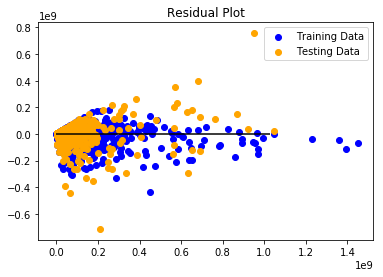

MSE: 5963918951125063.0, R2: 0.6449315015003323


In [92]:
# Plot the Residuals for the Training and Testing data
### BEGIN SOLUTION

predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)
plt.scatter((np.expand_dims(clf.predict(X_train), axis = 1)), (np.expand_dims(clf.predict(X_train), axis = 1)) - y_train, c="blue", label="Training Data")
plt.scatter(predictions2, predictions2 - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

MSE = mean_squared_error(y_test, predictions2)
r2 = clf.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [93]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [94]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

In [95]:
# Create a LinearRegression model and fit it to the scaled training data
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

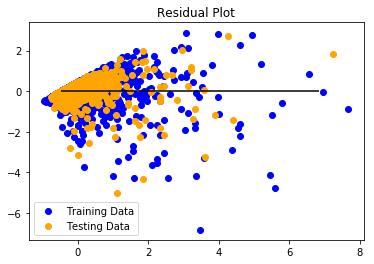

In [96]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model2.predict(X_test_scaled)
plt.scatter(model2.predict(X_train_scaled), model2.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(predictions, predictions - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [97]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model2.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3315686877309889, R2: 0.6129383070218222


# Ridge Model

In [98]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.33156876360913146, R2: 0.6129382184443315


# ElasticNet model

In [99]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3328360218151037, R2: 0.6114588655235211


# GradientBoostingRegressor

In [100]:
# Note:  Changing max depth from 4 to 6 increased the score from .87 to .94 BUT decreased our kaggle overall score.
#Note: Increasing the learning rate from .01 to .1 increased score to .97 BUT decreased our kaggle overall score.
import numpy as np
import matplotlib.pyplot as plt
# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'} 
gbr = ensemble.GradientBoostingRegressor(**params)
predictions2 = gbr.fit(X_train_scaled,y_train_scaled)
training_score = gbr.score(X_train_scaled, y_train_scaled)
print(f"Training Score: {training_score}")

Training Score: 0.8884335793221041


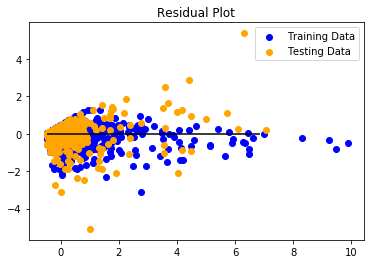

MSE: 0.3031604681809145, R2: 0.6461010692500477


In [101]:
# Plot the Residuals for the Training and Testing data
### BEGIN SOLUTION

predictions2 = np.expand_dims(gbr.predict(X_test_scaled), axis = 1)
plt.scatter((np.expand_dims(gbr.predict(X_train_scaled), axis = 1)), (np.expand_dims(gbr.predict(X_train_scaled), axis = 1)) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(predictions2, predictions2 - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

MSE = mean_squared_error(y_test_scaled, predictions2)
r2 = gbr.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

# Random Forest Regressor

class sklearn.ensemble.RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)[source]

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf = rf.fit(X_train_scaled, y_train_scaled)
rf.score(X_train_scaled, y_train_scaled)

0.9381450095266395

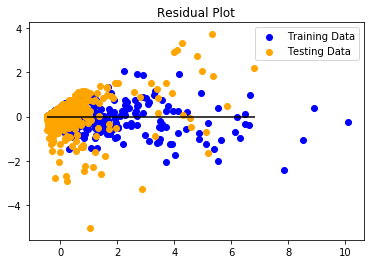

MSE: 0.3601407877370828, R2: 0.5795842364792106


In [105]:
# Plot the Residuals for the Training and Testing data
### BEGIN SOLUTION

predictions3 = np.expand_dims(rf.predict(X_test_scaled), axis = 1)
plt.scatter((np.expand_dims(rf.predict(X_train_scaled), axis = 1)), (np.expand_dims(rf.predict(X_train_scaled), axis = 1)) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(predictions3, predictions3 - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

MSE = mean_squared_error(y_test_scaled, predictions3)
r2 = rf.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

In [106]:
feature_names = X_train.columns

In [107]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5822634748005617, 'budget'),
 (0.11646773449820913, 'popularity'),
 (0.034624014757176816, 'month'),
 (0.03054103250385125, 'count_cast'),
 (0.02948777446969155, 'prodcoWt'),
 (0.02679192329659662, 'belongs_to_collection_True'),
 (0.02624457670687539, 'year'),
 (0.025837724877576136, 'count_staff'),
 (0.022722046741042, 'count_crew'),
 (0.022633036685381695, 'id'),
 (0.020342987497308777, 'castWt'),
 (0.01824775603852964, 'keywordWt'),
 (0.010480978027934258, 'count_genre'),
 (0.010343994211091084, 'count_keyword'),
 (0.008618875988595568, 'count_splang'),
 (0.007080197052533518, 'count_company'),
 (0.0060247688961438004, 'count_country'),
 (0.001247102950900961, 'language_enc')]

## LASSO

class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)

In [257]:
from sklearn.linear_model import Lasso
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train_scaled, y_train_scaled)
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
print(clf.coef_)
print(clf.intercept_)  
clf.score(X_train_scaled, y_train_scaled)

[ 0.          0.08081428  0.58829126 -0.          0.15065574 -0.
  0.          0.         -0.         -0.         -0.          0.00395897
  0.          0.          0.          0.         -0.          0.        ]
[3.14048262e-17]


0.628555151316379

In [ ]:
# Plot the Residuals for the Training and Testing data
### BEGIN SOLUTION

predictions3 = np.expand_dims(rf.predict(X_test_scaled), axis = 1)
plt.scatter((np.expand_dims(rf.predict(X_train_scaled), axis = 1)), (np.expand_dims(rf.predict(X_train_scaled), axis = 1)) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(predictions3, predictions3 - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

MSE = mean_squared_error(y_test_scaled, predictions3)
r2 = rf.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

# OUPUT

In [535]:
#Be sure to run the training model on the full X (train) before running the predictions for test

#Make New Predictions
gbr_predictions = pd.DataFrame(gbr.predict(test), columns = ['revenue'])
output = pd.concat([testID['id'], gbr_predictions], axis=1)

#rf_predictions = pd.DataFrame(rf.predict(test), columns = ['revenue'])
#output = pd.concat([testID['id'], rf_predictions], axis=1)

In [536]:
output.head()

,id,revenue
0,3001,0.647035
1,3002,5.236300
2,3003,1.100204
3,3004,4.851352
4,3005,4.762425


In [ ]:
output.to_csv("outputs/output_" + str(date.today()) + "_4" + ".csv", index=False)